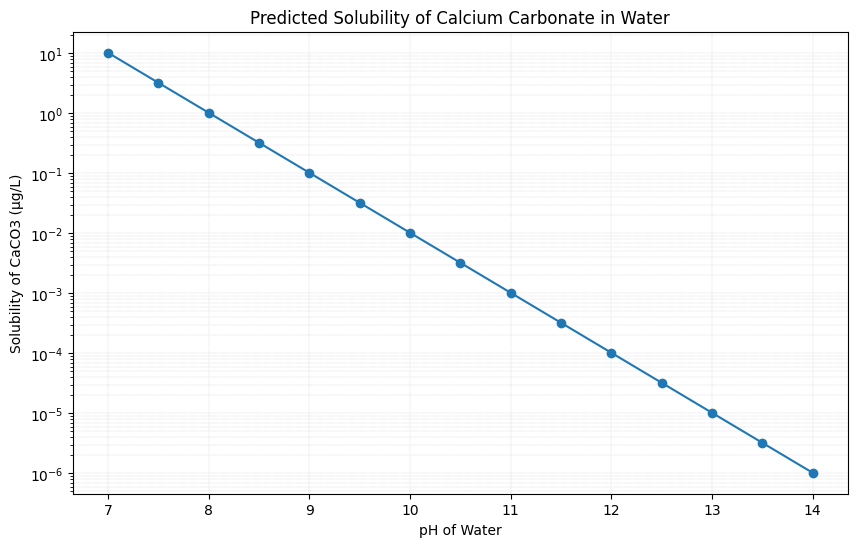

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate solubility of CaCO3 based on a more accurate model
def calculate_accurate_solubility(pH):
    # Constants
    Ksp_CaCO3 = 4.8e-9  # Solubility product constant at 25°C
    Kw = 1.0e-14  # Ion product of water at 25°C
    Ka2 = 4.69e-11  # Second dissociation constant of carbonic acid (HCO3- -> CO3^2- + H+)

    # Concentration of H+ from pH
    H_concentration = 10 ** (-pH)

    # Concentration of CO3^2- from equilibrium
    CO3_concentration = Ka2 / H_concentration

    # Solubility of CaCO3
    Ca_concentration = Ksp_CaCO3 / CO3_concentration

    return Ca_concentration * 1e6  # Convert from mg/L to µg/L

# Generate pH values from 7 to 14
pH_values = np.linspace(7, 14, 15)
solubility_values_accurate = [calculate_accurate_solubility(pH) for pH in pH_values]

# Create a dataframe to store the accurate values
accurate_solubility_data = pd.DataFrame({
    'pH': pH_values,
    'Solubility (µg/L)': solubility_values_accurate
})

# Plot the accurate solubility of CaCO3 from pH 7 to 14
plt.figure(figsize=(10, 6))
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility (µg/L)'], marker='o', linestyle='-')
plt.yscale('log')
plt.xlabel('pH of Water')
plt.ylabel('Solubility of CaCO3 (µg/L)')
plt.title('Predicted Solubility of Calcium Carbonate in Water')
plt.grid(True, which='both', linestyle='dotted', linewidth=0.3)
plt.savefig("accurate_caco3_solubility_pH7_to_14_ugL.png")
plt.show()


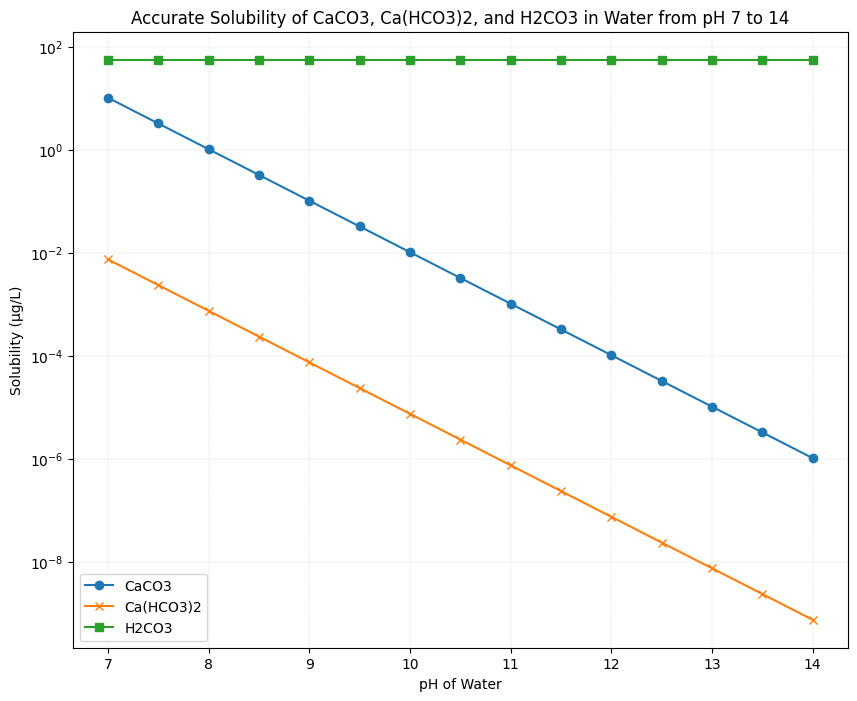

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate solubility of CaCO3 based on a more accurate model
def calculate_accurate_solubility_CaCO3(pH):
    # Constants
    Ksp_CaCO3 = 4.8e-9  # Solubility product constant at 25°C
    Ka2 = 4.69e-11  # Second dissociation constant of carbonic acid (HCO3- -> CO3^2- + H+)

    # Concentration of H+ from pH
    H_concentration = 10 ** (-pH)

    # Concentration of CO3^2- from equilibrium
    CO3_concentration = Ka2 / H_concentration

    # Solubility of CaCO3
    Ca_concentration = Ksp_CaCO3 / CO3_concentration

    return Ca_concentration * 1e6  # Convert from mg/L to µg/L

# Function to calculate solubility of Ca(HCO3)2
def calculate_accurate_solubility_CaHCO3(pH):
    # Constants
    Ksp_CaHCO3 = 3.3e-8  # Solubility product constant for Ca(HCO3)2 at 25°C
    Ka1 = 4.45e-7  # First dissociation constant of carbonic acid (H2CO3 -> HCO3- + H+)
    Ka2 = 4.69e-11  # Second dissociation constant of carbonic acid (HCO3- -> CO3^2- + H+)

    # Concentration of H+ from pH
    H_concentration = 10 ** (-pH)

    # Concentration of HCO3- from equilibrium
    HCO3_concentration = Ka1 / H_concentration

    # Solubility of Ca(HCO3)2
    Ca_concentration = Ksp_CaHCO3 / HCO3_concentration

    return Ca_concentration * 1e6  # Convert from mg/L to µg/L

# Function to calculate concentration of H2CO3
def calculate_accurate_concentration_H2CO3(pH):
    # Constants
    Kh = 1.7e-3  # Henry's law constant for CO2 in water at 25°C
    CO2_concentration = 0.033  # Typical concentration of CO2 in water (moles per liter)

    # Concentration of H2CO3 directly related to Henry's law constant
    H2CO3_concentration = Kh * CO2_concentration

    return H2CO3_concentration * 1e6  # Convert from moles/L to µg/L

# Generate pH values from 7 to 14
pH_values = np.linspace(7, 14, 15)
solubility_values_CaCO3 = [calculate_accurate_solubility_CaCO3(pH) for pH in pH_values]
solubility_values_CaHCO3 = [calculate_accurate_solubility_CaHCO3(pH) for pH in pH_values]
solubility_values_H2CO3 = [calculate_accurate_concentration_H2CO3(pH) for pH in pH_values]

# Create a dataframe to store the accurate values
accurate_solubility_data = pd.DataFrame({
    'pH': pH_values,
    'Solubility_CaCO3 (µg/L)': solubility_values_CaCO3,
    'Solubility_Ca(HCO3)2 (µg/L)': solubility_values_CaHCO3,
    'Solubility_H2CO3 (µg/L)': solubility_values_H2CO3
})

# Plot the accurate solubility of CaCO3, Ca(HCO3)2, and H2CO3 from pH 7 to 14
plt.figure(figsize=(10, 8))
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_CaCO3 (µg/L)'], label='CaCO3', marker='o', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_Ca(HCO3)2 (µg/L)'], label='Ca(HCO3)2', marker='x', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_H2CO3 (µg/L)'], label='H2CO3', marker='s', linestyle='-')
plt.yscale('log')
plt.xlabel('pH of Water')
plt.ylabel('Solubility (µg/L)')
plt.title('Accurate Solubility of CaCO3, Ca(HCO3)2, and H2CO3 in Water from pH 7 to 14')
plt.legend()
plt.grid(True, which='both', linestyle='dotted', linewidth=0.3)
plt.savefig("accurate_solubility_all_pH7_to_14_ugL.png")
plt.show()



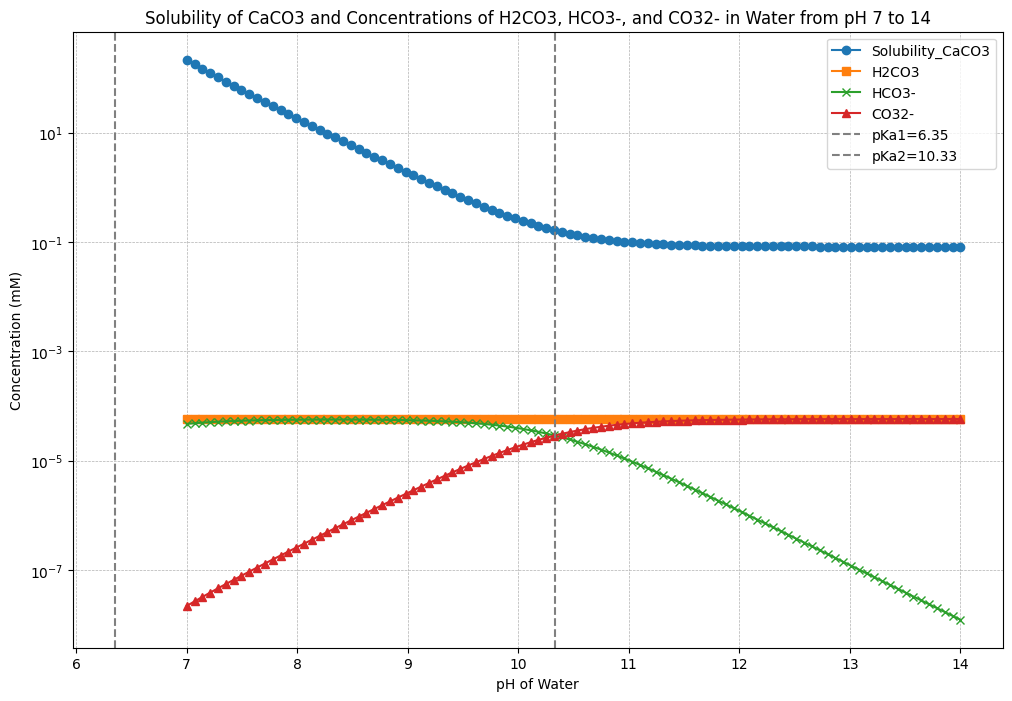

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
Ksp_CaCO3 = 4.8e-9  # Solubility product constant at 25°C for CaCO3
H2CO3_concentration = 0.058  # Assumed constant concentration in mM
pKa1 = 6.35
pKa2 = 10.33

# Convert H2CO3_concentration to M
H2CO3_concentration_M = H2CO3_concentration * 1e-3

# Generate pH values from 7 to 14
pH_values = np.linspace(7, 14, 100)

# Function to calculate concentrations of H2CO3, HCO3-, and CO32- based on pH and pKa values
def calculate_species_concentrations(pH, H2CO3_concentration):
    H_concentration = 10 ** (-pH)
    HCO3_concentration = H2CO3_concentration * (10 ** (pH - pKa1)) / (1 + (10 ** (pH - pKa1)) + (10 ** (pH - pKa1 + pH - pKa2)))
    CO3_concentration = H2CO3_concentration * (10 ** (pH - pKa1 + pH - pKa2)) / (1 + (10 ** (pH - pKa1)) + (10 ** (pH - pKa1 + pH - pKa2)))
    return H2CO3_concentration, HCO3_concentration, CO3_concentration

# Calculate solubility of CaCO3
solubility_values_CaCO3 = []
for pH in pH_values:
    _, _, CO3_concentration = calculate_species_concentrations(pH, H2CO3_concentration_M)
    Ca_concentration = Ksp_CaCO3 / CO3_concentration
    solubility_values_CaCO3.append(Ca_concentration * 1e3)  # Convert to mM

# Calculate concentrations of H2CO3, HCO3-, and CO32- for each pH
species_concentrations = [calculate_species_concentrations(pH, H2CO3_concentration_M) for pH in pH_values]
H2CO3_values, HCO3_values, CO3_values = zip(*species_concentrations)

# Create a dataframe to store the accurate values
accurate_solubility_data = pd.DataFrame({
    'pH': pH_values,
    'Solubility_CaCO3 (mM)': solubility_values_CaCO3,
    'H2CO3 (mM)': H2CO3_values,
    'HCO3- (mM)': HCO3_values,
    'CO32- (mM)': CO3_values
})

# Plot the solubility of CaCO3 and concentrations of H2CO3, HCO3-, and CO32- from pH 7 to 14
plt.figure(figsize=(12, 8))
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_CaCO3 (mM)'], label='Solubility_CaCO3', marker='o', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['H2CO3 (mM)'], label='H2CO3', marker='s', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['HCO3- (mM)'], label='HCO3-', marker='x', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['CO32- (mM)'], label='CO32-', marker='^', linestyle='-')
plt.yscale('log')
plt.xlabel('pH of Water')
plt.ylabel('Concentration (mM)')
plt.title('Solubility of CaCO3 and Concentrations of H2CO3, HCO3-, and CO32- in Water from pH 7 to 14')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(x=pKa1, color='gray', linestyle='--', label=f'pKa1={pKa1}')
plt.axvline(x=pKa2, color='gray', linestyle='--', label=f'pKa2={pKa2}')
plt.legend()
plt.savefig("accurate_solubility_species_pH7_to_14_mM.png")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
Ksp_CaCO3 = 4.8e-9  # Solubility product constant at 25°C for CaCO3
Ksp_CaHCO3 = 3.3e-8  # Solubility product constant for Ca(HCO3)2 at 25°C
Ka1 = 4.45e-7  # First dissociation constant of carbonic acid (H2CO3 -> HCO3- + H+)
Ka2 = 4.69e-11  # Second dissociation constant of carbonic acid (HCO3- -> CO3^2- + H+)
H2CO3_concentration = 0.058  # Assumed constant concentration in mM
pKa1 = 6.35
pKa2 = 10.33

# Convert H2CO3_concentration to M
H2CO3_concentration_M = H2CO3_concentration * 1e-3

# Generate pH values from 7 to 14
pH_values = np.linspace(7, 14, 100)

# Function to calculate concentrations of H2CO3, HCO3-, and CO32- based on pH and pKa values
def calculate_species_concentrations(pH, H2CO3_concentration):
    H_concentration = 10 ** (-pH)
    HCO3_concentration = H2CO3_concentration * (10 ** (pH - pKa1)) / (1 + (10 ** (pH - pKa1)) + (10 ** (pH - pKa1 + pH - pKa2)))
    CO3_concentration = H2CO3_concentration * (10 ** (pH - pKa1 + pKa2)) / (1 + (10 ** (pH - pKa1)) + (10 ** (pH - pKa1 + pKa2)))
    return H2CO3_concentration, HCO3_concentration, CO3_concentration

# Function to calculate solubility of CaCO3
def calculate_accurate_solubility_CaCO3(pH):
    _, _, CO3_concentration = calculate_species_concentrations(pH, H2CO3_concentration_M)
    Ca_concentration = Ksp_CaCO3 / CO3_concentration
    return Ca_concentration * 1e3  # Convert to mM

# Function to calculate solubility of Ca(HCO3)2
def calculate_accurate_solubility_CaHCO3(pH):
    # Concentration of H+ from pH
    H_concentration = 10 ** (-pH)

    # Concentration of HCO3- from equilibrium
    HCO3_concentration = Ka1 / H_concentration

    # Solubility of Ca(HCO3)2
    Ca_concentration = Ksp_CaHCO3 / HCO3_concentration

    return Ca_concentration * 1e3  # Convert from M to mM

# Calculate solubility of CaCO3 and Ca(HCO3)2
solubility_values_CaCO3 = [calculate_accurate_solubility_CaCO3(pH) for pH in pH_values]
solubility_values_CaHCO3 = [calculate_accurate_solubility_CaHCO3(pH) for pH in pH_values]

# Calculate concentrations of H2CO3, HCO3-, and CO32- for each pH
species_concentrations = [calculate_species_concentrations(pH, H2CO3_concentration_M) for pH in pH_values]
H2CO3_values, HCO3_values, CO3_values = zip(*species_concentrations)

# Create a dataframe to store the accurate values
accurate_solubility_data = pd.DataFrame({
    'pH': pH_values,
    'Solubility_CaCO3 (mM)': solubility_values_CaCO3,
    'Solubility_Ca(HCO3)2 (mM)': solubility_values_CaHCO3,
    'H2CO3 (mM)': H2CO3_values,
    'HCO3- (mM)': HCO3_values,
    'CO32- (mM)': CO3_values
})

# Plot the solubility of CaCO3
plt.figure(figsize=(12, 8))
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_CaCO3 (mM)'], label='Solubility_CaCO3', marker='o', linestyle='-')
plt.yscale('log')
plt.xlabel('pH of Water')
plt.ylabel('Solubility (mM)')
plt.title('Solubility of CaCO3 in Water from pH 7 to 14')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(x=pKa1, color='gray', linestyle='--', label=f'pKa1={pKa1}')
plt.axvline(x=pKa2, color='gray', linestyle='--', label=f'pKa2={pKa2}')
plt.legend()
plt.savefig("solubility_CaCO3_pH7_to_14_mM.png")
plt.show()

# Plot the solubility of Ca(HCO3)2
plt.figure(figsize=(12, 8))
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_Ca(HCO3)2 (mM)'], label='Solubility_Ca(HCO3)2', marker='o', linestyle='-')
plt.yscale('log')
plt.xlabel('pH of Water')
plt.ylabel('Solubility (mM)')
plt.title('Solubility of Ca(HCO3)2 in Water from pH 7 to 14')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(x=pKa1, color='gray', linestyle='--', label=f'pKa1={pKa1}')
plt.axvline(x=pKa2, color='gray', linestyle='--', label=f'pKa2={pKa2}')
plt.legend()
plt.savefig("solubility_CaHCO3_pH7_to_14_mM.png")
plt.show()

# Plot the relative proportions of H2CO3, HCO3-, and CO32-
plt.figure(figsize=(12, 8))
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['H2CO3 (mM)'], label='H2CO3', marker='s', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['HCO3- (mM)'], label='HCO3-', marker='x', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['CO32- (mM)'], label='CO32-', marker='^', linestyle='-')
plt.yscale('log')
plt.xlabel('pH of Water')
plt.ylabel('Concentration (mM)')
plt.title('Relative Proportions of H2CO3, HCO3-, and CO32- in Water from pH 7 to 14')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(x=pKa1, color='gray', linestyle='--', label=f'pKa1={pKa1}')
plt.axvline(x=pKa2, color='gray', linestyle='--', label=f'pKa2={pKa2}')
plt.legend()
plt.savefig("relative_proportions_pH7_to_14_mM.png")
plt.show()

# Plot the combined chart
plt.figure(figsize=(12, 8))
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_CaCO3 (mM)'], label='Solubility_CaCO3', marker='o', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['Solubility_Ca(HCO3)2 (mM)'], label='Solubility_Ca(HCO3)2', marker='d', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['H2CO3 (mM)'], label='H2CO3', marker='s', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['HCO3- (mM)'], label='HCO3-', marker='x', linestyle='-')
plt.plot(accurate_solubility_data['pH'], accurate_solubility_data['CO32- (mM)'], label='CO32-', marker='^', linestyle='-')
plt.yscale('log')
plt.xlabel('pH of Water')
plt.ylabel('Concentration (mM)')
plt.title('Combined Solubility and Proportions in Water from pH 7 to 14')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(x=pKa1, color='

plt.savefig("combined_solubility_proportions_pH7_to_14_mM.png")
plt.show()
